<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/RFM_Clustering_Analysis_X_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d hellbuoy/online-retail-customer-clustering

 97% 7.00M/7.22M [00:00<00:00, 69.1MB/s]
100% 7.22M/7.22M [00:00<00:00, 66.6MB/s]


In [9]:
from zipfile import ZipFile

with ZipFile("/content/online-retail-customer-clustering.zip",'r') as zip :
  zip.extractall()
  print("Done")

Done


In [10]:
import pandas as pd

In [86]:
data=pd.read_csv("/content/OnlineRetail.csv", encoding ="ISO-8859-1")

In [87]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [89]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [90]:
df=data.dropna()

In [91]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df["CustomerID"]=df["CustomerID"].astype(str)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [95]:
df.shape

(406829, 8)

In [96]:
df.to_csv("data_clean.csv")

In [97]:
#Prepare Data Kita
#Menggunakan metode RFM (Recency, Frequency, Monetary)
#Recency = Terakhir kali pelanggan melakukan pembelian
#Frequency = Seberapa seringnya pelanggan membeli
#Monetary = Nominal yang dikeluarkan

retail=df.copy()


In [98]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [99]:
#Membuat atribut Amount (Monetary)
retail["Amount"]=retail["Quantity"]*retail["UnitPrice"]
rfm_m=retail.groupby("CustomerID")["Amount"].sum()
rfm_m=rfm_m.reset_index()
rfm_m


,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [100]:
#Membuat atribut Frekusensi
rfm_f=retail.groupby("CustomerID")["InvoiceNo"].count()
rfm_f=rfm_f.reset_index()
rfm_f.columns=["CustomerID","Frequency"]
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [101]:
#Merge 2 field
rfm=pd.merge(rfm_f,rfm_m,on="CustomerID", how="inner")
rfm.head()

,CustomerID,Frequency,Amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [102]:
#Membuat atribut Recency
retail["InvoiceDate"]=pd.to_datetime(retail["InvoiceDate"],format='%d-%m-%Y %H:%M')

In [103]:
maxdate=max(retail["InvoiceDate"])

In [104]:
#Perbedaan Hari

retail["Perbedaan Hari"]=maxdate-retail["InvoiceDate"]

In [105]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Perbedaan Hari
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [106]:
#Mengambil terakhir kali tanggal transaksi berdasarkan lamanya hari
rfm_p=retail.groupby("CustomerID")["Perbedaan Hari"].min()
rfm_p=rfm_p.reset_index()
rfm_p

,CustomerID,Perbedaan Hari
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [107]:
rfm_p["Perbedaan Hari"]=rfm_p["Perbedaan Hari"].dt.days

In [108]:
rfm_p

,CustomerID,Perbedaan Hari
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [109]:
rfm=pd.merge(rfm,rfm_p,on="CustomerID", how="inner")
rfm

,CustomerID,Frequency,Amount,Perbedaan Hari
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


In [110]:
#Save file bersih RFM
rfm.to_csv("RFM_data.csv")

In [111]:
rfm.rename(columns={"Perbedaan Hari":"Recency"}, inplace=True)
rfm.head(2)

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.0,325
1,12347.0,182,4310.0,1


In [115]:
rfm=rfm[(rfm['Amount']>0)]
rfm

,CustomerID,Frequency,Amount,Recency
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
5,12352.0,95,1545.41,35
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


Text(0.5, 0, 'Attributes')

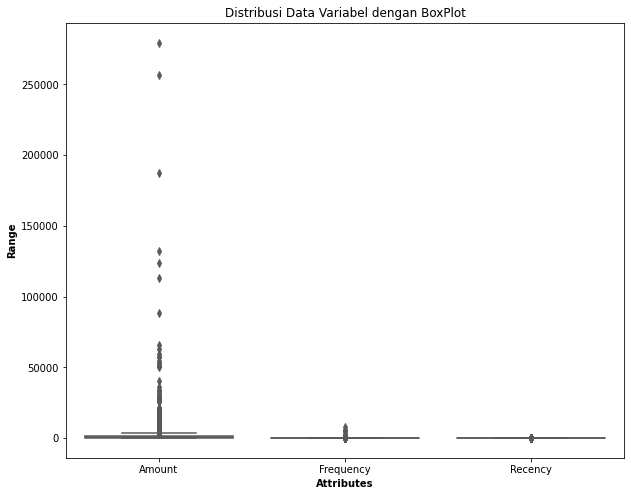

In [116]:
#Mendeteksi Outlier
#1. Statisik
#2. Data Spesifik

import matplotlib.pyplot as plt
import seaborn as sns
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=rfm[attributes], orient="v", palette="Set2")
plt.title("Distribusi Data Variabel dengan BoxPlot")
plt.ylabel("Range", fontweight="bold")
plt.xlabel("Attributes",fontweight="bold")

In [117]:
#Menghapus Outlier secara Statistik untuk variabel Amount

Q1=rfm.Amount.quantile(0.05)
Q3=rfm.Amount.quantile(0.95)
IQR = Q3-Q1

rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]


#Menghapus Outlier secara Statistik untuk varibael recency
Q1=rfm.Recency.quantile(0.05)
Q3=rfm.Recency.quantile(0.95)
IQR= Q3-Q1

rfm=rfm[(rfm.Recency >= Q1 -1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

#Menghapus Outlier secara Statistik untuk variabe Frequecy
Q1= rfm.Frequency.quantile(0.05)
Q3= rfm.Frequency.quantile(0.95)
IQR=Q3-Q1

rfm=rfm[(rfm.Frequency >= Q1-1.5*IQR) & (rfm.Frequency< Q3 + 1.5*IQR)]

In [118]:
#Rescalling using Standard Scalling

#Rescalling Attributes

rfm_df=rfm[['Amount','Frequency','Recency']]

#Instantiate
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#Fitting data to Tranform

rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4244, 3)

In [119]:
rfm_df_scaled=pd.DataFrame(data=rfm_df_scaled)
rfm_df_scaled.columns=["Amount","Frequency","Recency"]
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,1.708612,1.030307,-0.903890
1,0.286281,-0.470980,-0.169208
2,0.263814,-0.053404,-0.732799
3,-0.541750,-0.610172,2.195865
4,0.143734,0.165327,-0.561709


In [130]:
#1. K-Means Clustering (Non-Hierarchical Clustering)

In [120]:
#Building Model K-Meand Clustering
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=4, max_iter=1000)
kmeans.fit(rfm_df_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [121]:
kmeans.labels_

array([0, 2, 2, ..., 1, 2, 2], dtype=int32)

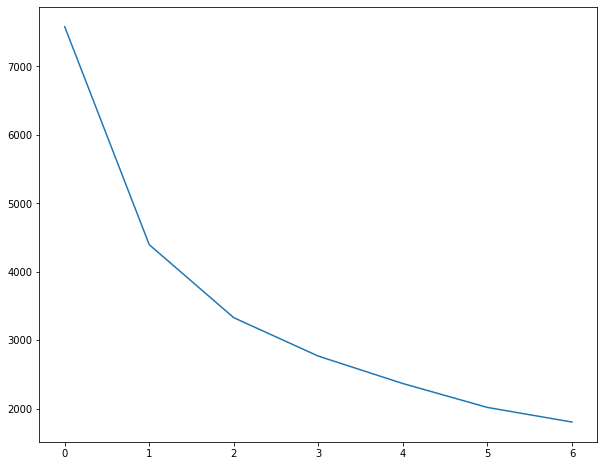

In [122]:
#Menetukan Cluster dengna Metode Elbow

ssd=[]
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
  kmeans.fit(rfm_df_scaled)

  ssd.append(kmeans.inertia_)

#Plot n_cluster
plt.plot(ssd)

In [123]:
#Menggunakan metode Silhouette

#Silhouette Analysis
from sklearn.metrics import silhouette_score


range_n_clusters =[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  #Inisiasi Kmeans
  kmeans =KMeans(n_clusters=num_clusters, max_iter=50)
  kmeans.fit(rfm_df_scaled)
  cluster_labels=kmeans.labels_

  #Silhouette Score
  silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
  print("Untuk n_cluster={0}, Silhouette Score yaitu {1}".format(num_clusters, silhouette_avg))

Untuk n_cluster=2, Silhouette Score yaitu 0.5403495688814853
Untuk n_cluster=3, Silhouette Score yaitu 0.5098143493780141
Untuk n_cluster=4, Silhouette Score yaitu 0.4849514955747055
Untuk n_cluster=5, Silhouette Score yaitu 0.4659547470441439
Untuk n_cluster=6, Silhouette Score yaitu 0.41820079901701657
Untuk n_cluster=7, Silhouette Score yaitu 0.41553138810585405
Untuk n_cluster=8, Silhouette Score yaitu 0.40717386650963067


In [124]:
#Model terakhir mengguakan K=3
kmeans =KMeans(n_clusters=3, max_iter=100)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [125]:
#Meihat hasil labeling dengan k=3

kmeans.labels_

array([2, 0, 0, ..., 1, 0, 0], dtype=int32)

In [126]:
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Frequency,Amount,Recency,Cluster_Id
1,12347.0,182,4310.00,1,2
2,12348.0,31,1797.24,74,0
3,12349.0,73,1757.55,18,0
4,12350.0,17,334.40,309,1
5,12352.0,95,1545.41,35,0


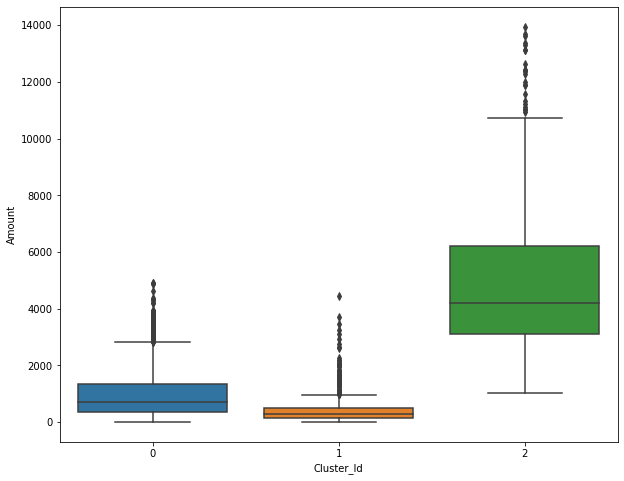

In [127]:
#Box Plot Visualisasi Cluster  vs Amount

sns.boxplot(data=rfm, x='Cluster_Id', y='Amount')

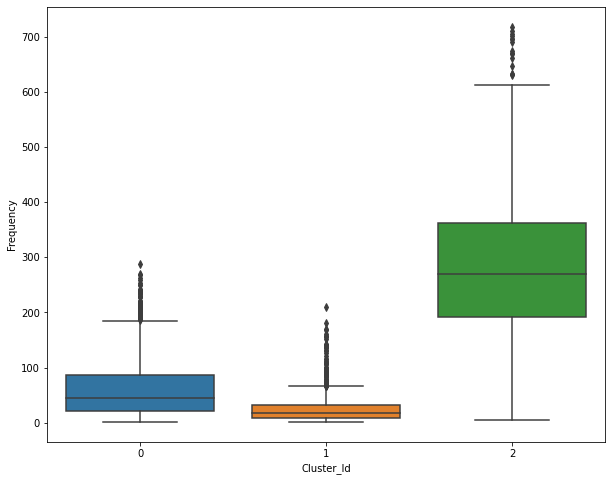

In [128]:
#Box Plot Visualisasi Cluster  vs Frequency

sns.boxplot(data=rfm, x='Cluster_Id', y='Frequency')

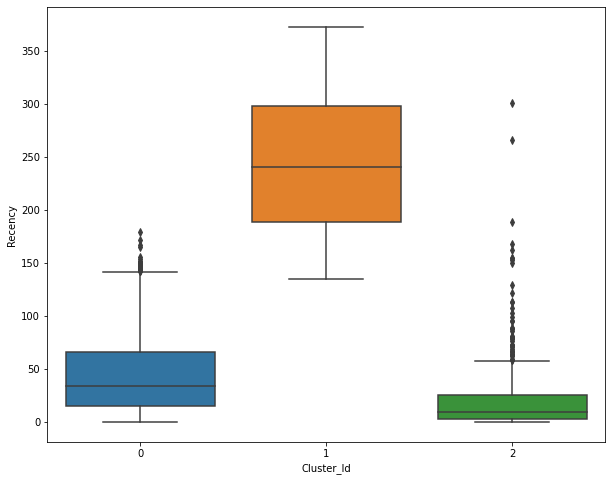

In [129]:
#Box Plot Visualisasi Cluster  vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)


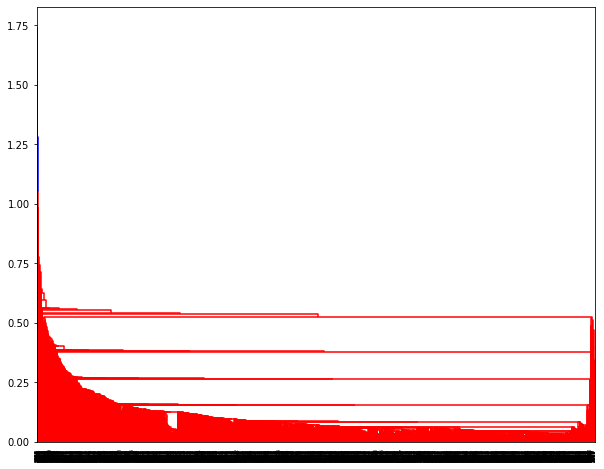

In [133]:
#Hierachical Clustering
#Single Linkage (Jarak Terdekat)

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

mergings=linkage(rfm_df_scaled, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

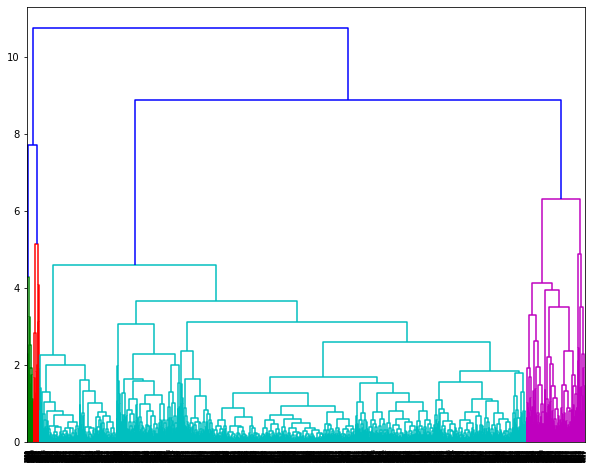

In [134]:
#Complete Linkage (Jarak Terjauh)

mergings=linkage(rfm_df_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

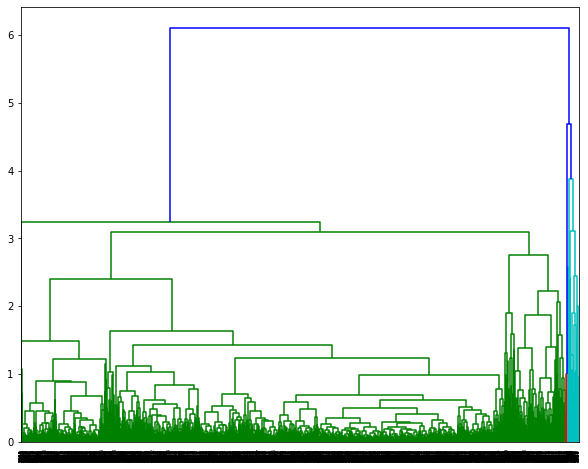

In [135]:
#Average Linkage (Jarak Rata rata)

mergings=linkage(rfm_df_scaled, method='average', metric='euclidean')
dendrogram(mergings)
plt.show()

In [136]:
#Dengrogram berdasarkan jumlah K=3

cluster_labels=cut_tree(mergings, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
rfm['Cluster_Labels']=cluster_labels
rfm.head()

,CustomerID,Frequency,Amount,Recency,Cluster_Id,Cluster_Labels
1,12347.0,182,4310.00,1,2,0
2,12348.0,31,1797.24,74,0,0
3,12349.0,73,1757.55,18,0,0
4,12350.0,17,334.40,309,1,0
5,12352.0,95,1545.41,35,0,0


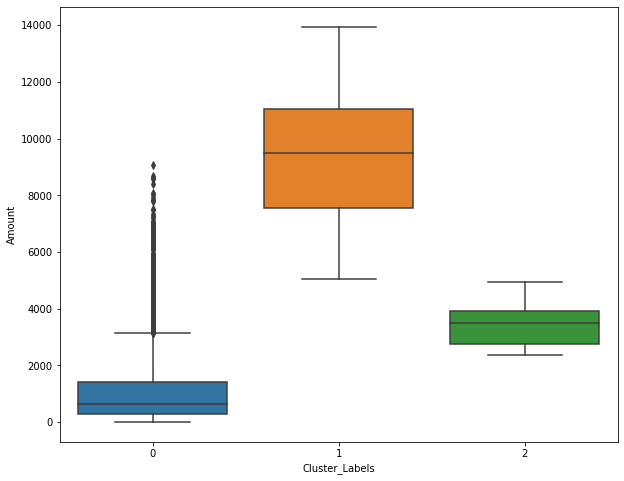

In [139]:
#Plot Cluster Id vs Amount

sns.boxplot(data=rfm,x='Cluster_Labels', y='Amount')

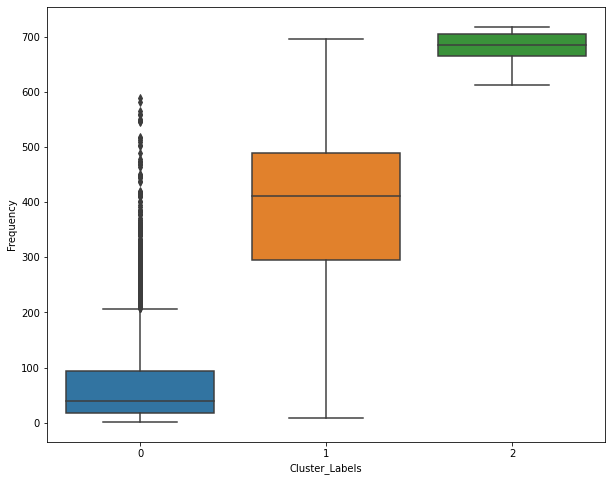

In [140]:
#Plot Cluster Id vs Frequency

sns.boxplot(data=rfm, x='Cluster_Labels', y='Frequency')

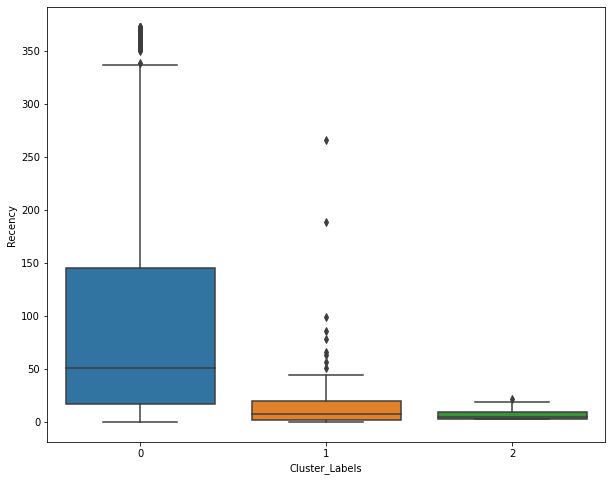

In [141]:
#Plot Cluster Id vs Recency

sns.boxplot(data=rfm, x='Cluster_Labels',y='Recency')

In [142]:
#Inferensial
#K-Means dijadikan berdasarkan 3 cluster dimana
#Custer 0 dengan pembelian yang menegah, frequensi  pembelian menengah begitu pula terakhir transaksi menengh dibandingkan cluster lain.
#Cluster 1 dengan pemebelian yang rendah, freuensi rendah namun pembeian kebanyakan masih baru melakukan transaksi terakhir
#Cluster 2 dengan pembelian yang tinggi begitu juga frekuensinya, pembelian terakhir sudah cukupl lama. Kemungkinan besar customer tipe ini membeli sekali banyak.

In [143]:
#Non Hierarki Clustering
#Cluster 0 yaitu customer dengan pembelian rendah, jarang membeli namun baru maelakukan transaksi
#Cluster 1 yaitu customer dengan pembelian tinggi, rekuensinya juga tinggi namun terakhir transaksi sudah cukup lama
#Cluster 2 yaitu customer dengan pembelian sedang, frekuensinya tinggi,namun sudah lama melakukan transaksi terakhir.